In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [8]:
# label encoding using dictionary
lung={'LUNG_CANCER':{'YES':1,'NO':0}}

In [ ]:
#df['relevance'] = df.choose_one.map(relevance)

In [9]:
df.replace(lung,inplace=True)

In [10]:
df['LUNG_CANCER'].head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [11]:
# Dropping specific column
df.drop('GENDER',axis=1,inplace=True)

In [12]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: title={'center': 'Features Standard Deviation'}>

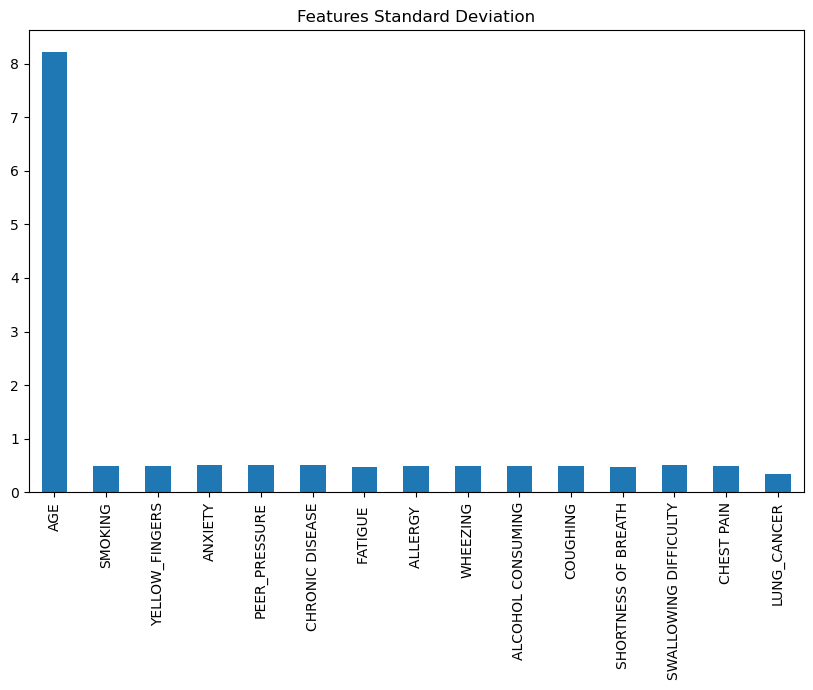

In [13]:
df.std().plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")

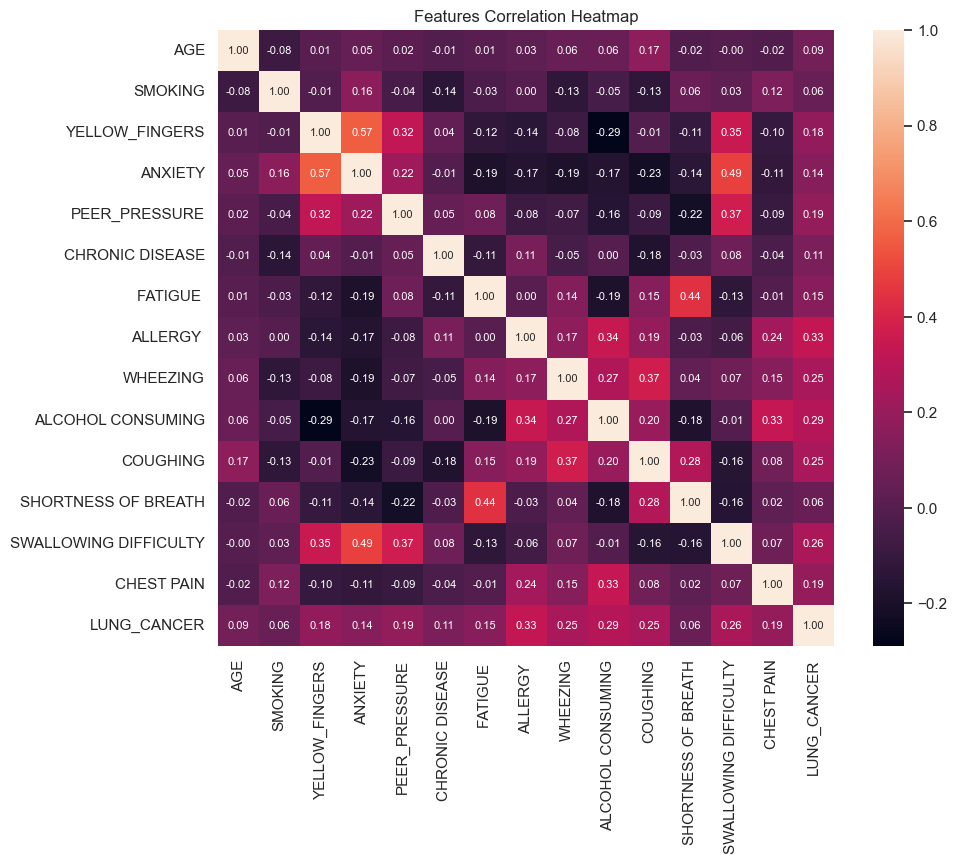

In [14]:
feat=df.columns

cm = np.corrcoef(df.values.T) # why tran
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=feat, xticklabels=feat)
plt.title('Features Correlation Heatmap')
plt.show()

In [15]:
# Excluding target column from data to get feature of x (independent)
x=df.loc[:, df.columns != 'LUNG_CANCER']

In [16]:
y=df['LUNG_CANCER']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracy = []
num_neigh = []
accuracy_rate=[]

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier. 
for ii in range(1,16):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)
    
    score=cross_val_score(KNN,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

print(accuracy)

[0.9193548387096774, 0.8387096774193549, 0.8870967741935484, 0.8225806451612904, 0.8709677419354839, 0.8709677419354839, 0.8870967741935484, 0.8870967741935484, 0.9193548387096774, 0.9193548387096774, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129]


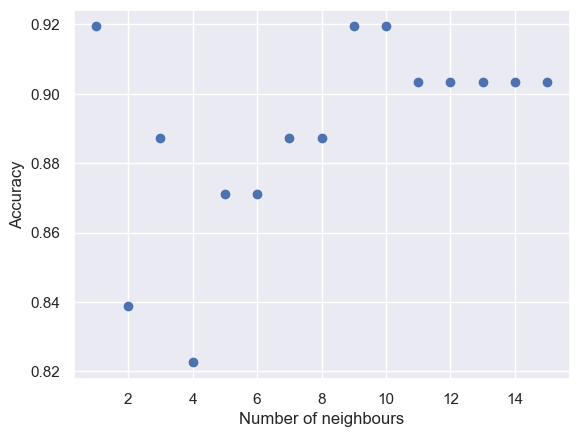

In [21]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

Text(0, 0.5, 'Accuracy Rate')

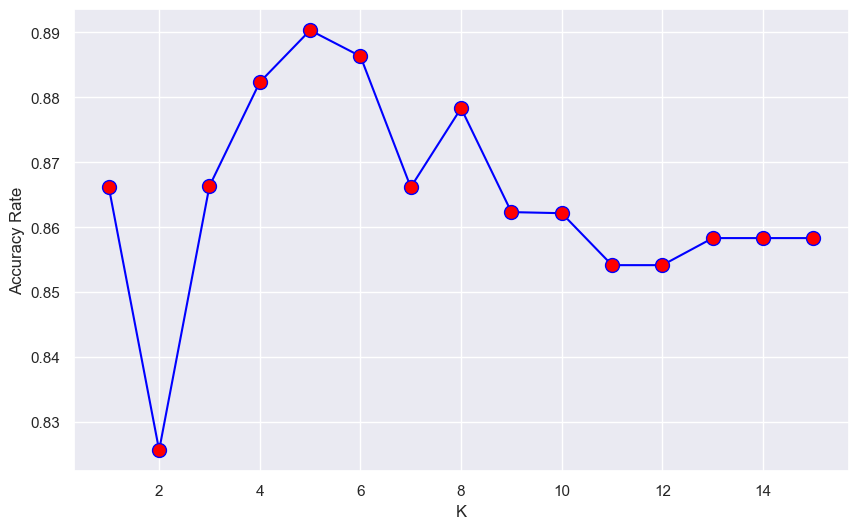

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),accuracy_rate,color='blue',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [25]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN = KNN.fit(x_train,y_train)

In [26]:
y_predict = KNN.predict(x_test)
mat=pd.crosstab(y_test,y_predict)

<Axes: xlabel='col_0', ylabel='LUNG_CANCER'>

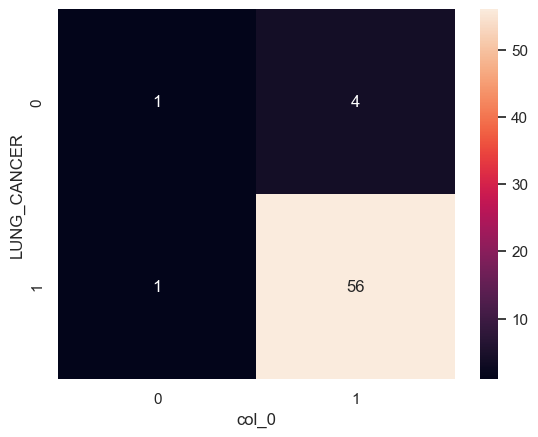

In [27]:
from sklearn.metrics import confusion_matrix 
sns.heatmap(mat,annot=True,fmt="d")

As we can there are 5 prediction are wrong

In [28]:
from sklearn.metrics import classification_report

score = KNN.score(x_test, y_test) # Score function automatically generate predict value from X_test and compare it with y_test
print(score*100)
print()
print(classification_report(y_test, y_predict))

91.93548387096774

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.93      0.98      0.96        57

    accuracy                           0.92        62
   macro avg       0.72      0.59      0.62        62
weighted avg       0.90      0.92      0.90        62

